In [1]:
from Fund import Fund
from FundVisualizer import FundVisualizer, setup_mpl
from datetime import date, timedelta
from matplotlib import pyplot as plt
from tqdm.notebook  import tqdm
import multiprocessing
import requests

setup_mpl()

In [ ]:
%matplotlib inline


fund_id_list = [
    '519002',
    '161818',
    '001069'
]

funds = {}
start_date = str(date.today() - timedelta(days=180))

# with requests.Session() as session:
#     for fund_id in tqdm(fund_id_list):
#         fund = Fund(fund_id, start_date)
#         fund.update_data(session)
#         funds[fund_id] = fund


def set_global_session():
    global session
    if not session:
        session = requests.Session()
        
def init_fund(fund_id):
    fund = Fund(fund_id, start_date)
    fund.update_data(session=session)
    return fund

with multiprocessing.Pool(initializer=set_global_session) as pool:
    pool.map(init_fund, fund_id_list)

<IPython.core.display.Javascript object>


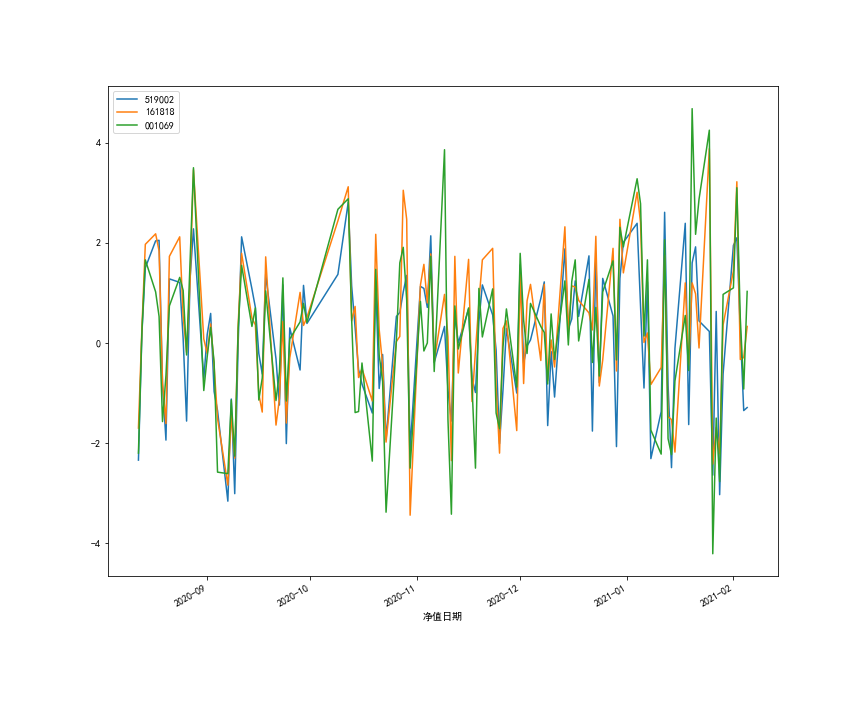

In [11]:
%matplotlib notebook

fig = plt.figure(figsize=(12,10)) 

for fid in funds.keys():
    funds[fid].data['日增长率'].plot()
plt.legend(funds.keys())